In [ ]:

import scipy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy_financial as npf





In [ ]:
#Base Case Scenario

In [ ]:
#Write the expected values of input drivers
nYear = 8
n = nYear +1
capex0=12 #Expected value of CAPEX in Million $ at t=0
nwc0=4 #Expected value of NWC in Million $ at t=0
Sales_Revenue1=40 #Sales Revenue at Year 1 in $Million
salesgrowthrate=0.07 #Expected growth in sales revenue
grossprofitmargin=0.4 #Gross Profit Margin Expected is 40%
interest=0.085
tax_rate=0.26
debt_to_asset=0.25

opexp=0.15   #operational_expense
ddb=0.25
cap=0.3      # capex_factor
nwc_incr=0.1   #  net working capital increase factor

# _68 implies between years 6 and 8
salesgrowthrate_68=0.03
grossprofitmargin_68=0.25
opexp_68=0.2
nwc_incr_68=0.15
cap_68=0.35


Below is a trial

In [ ]:
# TRIAL
# TRIAL

#Solving for Base Case scenario
salesrevenue = list(range(n))
grossprofit = list(range(n))
cogs = list(range(n))
salesrevenue[0]=0
Operating_expenses=list(range(n))

net_ppe=list(range(n))
#net_ppe[0]=12

ebitda=list(range(n))

depreciation=list(range(n))
depreciation[0]=0

ebit=list(range(n))

net_working_capital=list(range(n))
net_working_capital[0]=4

total_asset=list(range(n))
#total_asset[0]=16

interest_expense=list(range(n))
ebt=list(range(n))

debt=list(range(n))
#debt[0]=4

tax=list(range(n))

equity=list(range(n))
#equity[0]=12

pat=list(range(n))

accumulated_depreciation=list(range(n))
accumulated_depreciation[0]=0

gross_ppe=list(range(n))
gross_ppe[0]=12

capex=list(range(n))
capex[0]=gross_ppe[0]

da=list(range(n))

chamge_in_wc=list(range(n))

np_p=list(range(n))
np_p[0]=debt[0]

salvage_value=list(range(n))

fcfe=list(range(n))

operating_expenses=list(range(n))

wc_change=list(range(n))
wc_change[0]=net_working_capital[0]


for i in np.arange(nYear):
  salesrevenue[1] = Sales_Revenue1
  salesrevenue[i+1]=(1+salesgrowthrate)*salesrevenue[i]
  round_salesrevenue = [round(num, 2) for num in salesrevenue]

  grossprofit[i] = grossprofitmargin*salesrevenue[i]
  round_grossprofit = [round(num, 2) for num in grossprofit]

  cogs[i] = salesrevenue[i]-grossprofit[i]
  round_cogs = [round(num, 2) for num in cogs]

  operating_expenses[i]=salesrevenue[i]*opexp
  round_operating_expenses = [round(num, 2) for num in operating_expenses]

  ebitda[i]=grossprofit[i]- operating_expenses[i]
  round_ebitda = [round(num, 2) for num in ebitda]

  if (i+1<len(salesrevenue) and i!=0):# and (i+2<len(salesrevenue))):
    gross_ppe[i]=gross_ppe[i-1]+((cap)*(salesrevenue[i+1]-salesrevenue[i]))
  if i==nYear-1:
    gross_ppe[i+1]=gross_ppe[i]
  #gross_ppe[nYear]=gross_ppe[nYear-1]
  round_gross_ppe= [round(num, 2) for num in gross_ppe]

  net_ppe[i]=gross_ppe[i]-accumulated_depreciation[i]
  round_net_ppe=[round(num, 2) for num in net_ppe]

  depreciation[i+1]=net_ppe[i]*ddb
  round_depreciation = [round(num, 2) for num in depreciation]

  accumulated_depreciation[i+1]=accumulated_depreciation[i]+depreciation[i+1]
  round_accumulated_depreciation = [round(num, 2) for num in accumulated_depreciation]

  ebit[i]=ebitda[i]-depreciation[i]
  round_ebit=[round(num, 2) for num in ebit]

  interest_expense[i+1]=debt[i]*interest
  round_interest_expense=[round(num, 2) for num in interest_expense]

  ebt[i]=ebit[i]-interest_expense[i]
  round_ebt=[round(num, 2) for num in ebt]

  tax[i]=ebt[i]*tax_rate
  round_tax=[round(num, 2) for num in tax]

  #if salesrevenue[i+2] :
  if (i+1<len(salesrevenue) and i!=0):#i+2<len(salesrevenue)):
    net_working_capital[i]=net_working_capital[i-1]+(nwc_incr*(salesrevenue[i+1]-salesrevenue[i]))
  if i==nYear-1:
    net_working_capital[i+1]=net_working_capital[i]
  #net_working_capital[nYear]=net_working_capital[nYear-1]
  round_net_working_capital=[round(num, 2) for num in net_working_capital]

  total_asset[i]=net_ppe[i]+net_working_capital[i]
  round_total_asset=[round(num, 2) for num in total_asset]

  debt[i]=total_asset[i]*debt_to_asset
  round_debt=[round(num, 2) for num in debt]

  equity[i]=total_asset[i]-debt[i]
  round_equity=[round(num, 2) for num in equity]

  pat[i]=ebt[i]-tax[i]
  round_pat=[round(num, 2) for num in pat]

  da[i]=depreciation[i]
  round_da=[round(num, 2) for num in da]



  if i!=0:
    wc_change[i]=net_working_capital[i]-net_working_capital[i-1]
    capex[i]=gross_ppe[i]-gross_ppe[i-1]
  else:
    wc_change[i]=net_working_capital[0]
    capex[0]=gross_ppe[0]
  round_wc_change=[round(num, 2) for num in wc_change]
  round_capex=[round(num, 2) for num in capex]



  if i!=0:
    np_p[i]=debt[i]-debt[i-1]
  else:
    np_p[0]=debt[0]
  round_np_p=[round(num, 2) for num in np_p]

  #net_income=
  #round_net_income=[round(num, 2) for num in net_income]

  fcfe[i]= -capex[i]-wc_change[i]+pat[i]+depreciation[i]+np_p[i]
  round_fcfe=[round(num, 2) for num in fcfe]



salvage_value[nYear]=net_ppe[nYear]+net_working_capital[nYear]
fcfe[nYear]=-capex[nYear]-wc_change[nYear]+pat[nYear]+depreciation[nYear]+np_p[nYear]+salvage_value[nYear]
print(gross_ppe[8]-accumulated_depreciation[8])

print("Sales Revenue", round_salesrevenue[:n])
print("COGS", round_cogs[:n])
print("Gross Profit", round_grossprofit[:n])


4.099940860308127
Sales Revenue [0, 40, 42.8, 45.8, 49.0, 52.43, 56.1, 60.03, 64.23]
COGS [0.0, 24.0, 25.68, 27.48, 29.4, 31.46, 33.66, 36.02, 8]
Gross Profit [0.0, 16.0, 17.12, 18.32, 19.6, 20.97, 22.44, 24.01, 8]


**PART A **

In [ ]:
#Write the expected values of input drivers
import numpy as np
import pandas as pd
nYear = 8
n = nYear +1
capex0=12 #Expected value of CAPEX in Million $ at t=0
nwc0=4 #Expected value of NWC in Million $ at t=0
Sales_Revenue1=40 #Sales Revenue at Year 1 in $Million
salesgrowthrate=0.07 #Expected growth in sales revenue
grossprofitmargin=0.4 #Gross Profit Margin Expected is 40%
interest=0.085
tax_rate=0.26
debt_to_asset=0.25

opexp = 0.15  # Operating Expenses
ddb = 0.25  # Declining Balance Depreciation (Double Declining Balance)
cap = 0.3  # Capital Expenditure Ratio
nwc_incr = 0.1  # Net Working Capital Increment

#  _68 : between year 6 to 8
salesgrowthrate_68=0.03
grossprofitmargin_68=0.25
opexp_68=0.2          # operating expense factor
nwc_incr_68=0.15   #increase in net working capital
cap_68=0.35         # capex-relate dfactor



salesrevenue = list(range(n))
grossprofit = list(range(n))
cogs = list(range(n))
salesrevenue[0]=0
Operating_expenses=list(range(n))

net_ppe=list(range(n))
net_ppe[0]=12

ebitda=list(range(n))

depreciation=list(range(n))
depreciation[0]=0

ebit=list(range(n))

net_working_capital=list(range(n))
net_working_capital[0]=4

total_asset=list(range(n))
total_asset[0]=16

interest_expense=list(range(n))
ebt=list(range(n))

debt=list(range(n))
debt[0]=4

tax=list(range(n))

equity=list(range(n))
equity[0]=12

pat=list(range(n))

accumulated_depreciation=list(range(n))
accumulated_depreciation[0]=0

gross_ppe=list(range(n))
gross_ppe[0]=12

capex=list(range(n))
capex[0]=gross_ppe[0]

da=list(range(n))

chamge_in_wc=list(range(n))

np_p=list(range(n))
np_p[0]=debt[0]

#salvage_value=list(range(n))

length = 9  # specify the desired length of the list
salvage_value= [0] * length
round_salvage_value= [0] * length


fcfe=list(range(n))

operating_expenses=list(range(n))

wc_change=list(range(n))
wc_change[0]=net_working_capital[0]

salesrevenue[0]=0
cogs[0]=0
grossprofit[0]=0
operating_expenses[0]=0
ebit[0]=0
ebitda[0]=0
depreciation[0]=0
ebit[0]=0
tax[0]=0
pat[0]=0
accumulated_depreciation[0]=0

# First for loop: Initialize independent values
for i in range(1, 9):
    if i==1:
        salesrevenue[1]=40
    else:
        salesrevenue[i] = (1 + salesgrowthrate) * salesrevenue[i-1]
    round_salesrevenue = [round(num, 2) for num in salesrevenue]

    grossprofit[i] = grossprofitmargin * salesrevenue[i]
    round_grossprofit = [round(num, 2) for num in grossprofit]

    cogs[i] = salesrevenue[i] - grossprofit[i]
    round_cogs = [round(num, 2) for num in cogs]

    operating_expenses[i] = salesrevenue[i] * opexp
    round_operating_expenses = [round(num, 2) for num in operating_expenses]

    ebitda[i] = grossprofit[i] - operating_expenses[i]
    round_ebitda = [round(num, 2) for num in ebitda]

# Second for loop: Calculates dependent values such as net PPE, depreciation, and other financial metrics
for i in range(1, 9): # Loop through each year from 1 to 8 (inclusive)
  # Check if i+1 is within the bounds of the salesrevenue array to avoid index error
    if i + 1 < len(salesrevenue):
        gross_ppe[i] = gross_ppe[i - 1] + ((cap) * (salesrevenue[i + 1] - salesrevenue[i]))
    if i == nYear: # If i is the last year, maintain the same value for gross PPE as the previous year
        gross_ppe[i] = gross_ppe[i-1]
    round_gross_ppe = [round(num, 2) for num in gross_ppe]
    depreciation[i] = net_ppe[i-1] * ddb

    accumulated_depreciation[i] = accumulated_depreciation[i-1] + depreciation[i]
    net_ppe[i] = gross_ppe[i] - accumulated_depreciation[i]
    round_net_ppe = [round(num, 2) for num in net_ppe]

    ebit[i] = ebitda[i] - depreciation[i]
    round_ebit = [round(num, 2) for num in ebit]

    interest_expense[i] = debt[i - 1] * interest

    ebt[i] = ebit[i] - interest_expense[i]
    round_ebt = [round(num, 2) for num in ebt]

    tax[i] = ebt[i] * tax_rate
    round_tax = [round(num, 2) for num in tax]

    if i + 1 < len(salesrevenue):  # Check if i+1 is within the bounds of the salesrevenue array to avoid index errors
        net_working_capital[i] = net_working_capital[i - 1] + ((nwc_incr) * (salesrevenue[i + 1] - salesrevenue[i]))

    if i == nYear: # If i is the last year, maintain the same value for net working capital as the previous year
        net_working_capital[i] = net_working_capital[i-1]
    round_net_working_capital = [round(num, 2) for num in net_working_capital]

    total_asset[i] = net_ppe[i] + net_working_capital[i]
    round_total_asset = [round(num, 2) for num in total_asset]

    debt[i] = total_asset[i] * debt_to_asset
    round_debt = [round(num, 2) for num in debt]

    equity[i] = total_asset[i] - debt[i]
    round_equity = [round(num, 2) for num in equity]

    pat[i] = ebt[i] - tax[i]
    round_pat = [round(num, 2) for num in pat]

    da[i] = depreciation[i]
    round_da = [round(num, 2) for num in da]

    wc_change[i] = net_working_capital[i] - net_working_capital[i - 1]
    capex[i] = gross_ppe[i] - gross_ppe[i - 1]

    round_accumulated_depreciation = [round(num, 2) for num in accumulated_depreciation]
    round_interest_expense = [round(num, 2) for num in interest_expense]
    round_wc_change = [round(num, 2) for num in wc_change]
    round_capex = [round(num, 2) for num in capex]
    round_depreciation = [round(num, 2) for num in depreciation]

    np_p[i] = debt[i] - debt[i - 1]
    round_np_p = [round(num, 2) for num in np_p]

    fcfe[i] = -capex[i] - wc_change[i] + pat[i] + depreciation[i] + np_p[i]
    round_fcfe = [round(num, 2) for num in fcfe]
fcfe[0] = -capex[0] - wc_change[0] + pat[0] + depreciation[0] + np_p[0]

salvage_value[nYear]=net_ppe[nYear]+net_working_capital[nYear]
round_salvage_value[nYear]=round(salvage_value[nYear],2)

fcfe[nYear]=-capex[nYear]-wc_change[nYear]+pat[nYear]+depreciation[nYear]+np_p[nYear]+salvage_value[nYear]


round_fcfe = [round(num, 2) for num in fcfe]

print("Sales Revenue", round_salesrevenue[:n])
print("COGS", round_cogs[:n])
print("Gross Profit", round_grossprofit[:n])

print("EBITDA", round_ebitda[:n])
print("Gross PPE", round_gross_ppe[:n])
print("Depreciation", round_depreciation[:n])
print("Accumulated Depreciation", round_accumulated_depreciation[:n])
print("Net PPE", round_net_ppe[:n])
print("EBIT", round_ebit[:n])
print("Interest Expense", round_interest_expense[:n])
print("EBT", round_ebt[:n])
print("Tax", round_tax[:n])
print("Net Working Capital", round_net_working_capital[:n])
print("Debt", round_debt[:n])
print("Equity", round_equity[:n])
print("PAT", round_pat[:n])
print("DA", round_da[:n])
print("Capex", round_capex[:n])
print("Working Capital Change", round_wc_change[:n])
print("Net Proceeds/Payments", round_np_p[:n])
print("salvage value during last year: ",round_salvage_value)
# Uncomment and use if net_income is defined
# print("Net Income", round_net_income[:n])

print("FCFE", round_fcfe[:n])


years=np.arange(0,9)

df_income_statement = pd.DataFrame({
    'Year': years,
    'Sales Revenue': round_salesrevenue[0:9],
    'COGS': round_cogs[0:9],
    'Gross Profit': round_grossprofit[0:9],
    'Operating Expense': round_operating_expenses[0:9],
    'EBITDA': round_ebitda[0:9],
    'Depreciation': round_depreciation[0:9],
    'EBIT': round_ebit[0:9],
    'Interest Expense': round_interest_expense[0:9],
    'EBT': round_ebt[0:9],
    'Tax': round_tax[0:9],
    'PAT': round_pat[0:9],
}).set_index('Year').transpose()

df_balance_sheet = pd.DataFrame({
    'Year': years,
    'Gross PPE': round_gross_ppe[0:9],
    'Accumulated Depreciation': round_accumulated_depreciation[0:9],
    'Net PPE': round_net_ppe[0:9],
    'Net Working Capital': round_net_working_capital[0:9],
    'Debt': round_debt[0:9],
    'Equity': round_equity[0:9]
}).set_index('Year').transpose()

df_cash_flow = pd.DataFrame({
    'Year': years,
    'Net Income': round_pat[0:9],
    'DA': round_da[0:9],
    'Capex': round_capex[0:9],
    'Working Capital Change': round_wc_change[0:9],
    'Net Proceeds/Payments': round_np_p[0:9],
    'Salvage value': round_salvage_value[0:9],
    'FCFE': round_fcfe[0:9]
}).set_index('Year').transpose()
print("\nproforma income statement\n")
display(df_income_statement)

print("\n proforma balance sheet \n")
display(df_balance_sheet)

print("\n cash flow projections \n")
display(df_cash_flow)

cost_of_equity = 0.15 # 15% p.a. EAR

# Calculate NPV
print("\n ")
npv = npf.npv(cost_of_equity, round_fcfe)
print(f"NPV: {npv:.2f}")

# Calculate IRR
print("\n ")
irr = npf.irr(round_fcfe)

print(f"IRR: {irr:.4f} or {irr * 100:.2f}% p.a.")





Sales Revenue [0, 40, 42.8, 45.8, 49.0, 52.43, 56.1, 60.03, 64.23]
COGS [0, 24.0, 25.68, 27.48, 29.4, 31.46, 33.66, 36.02, 38.54]
Gross Profit [0, 16.0, 17.12, 18.32, 19.6, 20.97, 22.44, 24.01, 25.69]
EBITDA [0, 10.0, 10.7, 11.45, 12.25, 13.11, 14.03, 15.01, 16.06]
Gross PPE [12, 12.84, 13.74, 14.7, 15.73, 16.83, 18.01, 19.27, 19.27]
Depreciation [0, 3.0, 2.46, 2.07, 1.79, 1.6, 1.48, 1.4, 1.37]
Accumulated Depreciation [0, 3.0, 5.46, 7.53, 9.32, 10.92, 12.4, 13.8, 15.17]
Net PPE [12, 9.84, 8.28, 7.17, 6.41, 5.91, 5.61, 5.47, 4.1]
EBIT [0, 7.0, 8.24, 9.38, 10.46, 11.51, 12.55, 13.61, 14.69]
Interest Expense [0, 0.34, 0.3, 0.27, 0.26, 0.25, 0.24, 0.25, 0.25]
EBT [0, 6.66, 7.94, 9.11, 10.2, 11.26, 12.3, 13.36, 14.44]
Tax [0, 1.73, 2.06, 2.37, 2.65, 2.93, 3.2, 3.47, 3.75]
Net Working Capital [4, 4.28, 4.58, 4.9, 5.24, 5.61, 6.0, 6.42, 6.42]
Debt [4, 3.53, 3.21, 3.02, 2.91, 2.88, 2.9, 2.97, 2.63]
Equity [12, 10.59, 9.64, 9.05, 8.74, 8.64, 8.71, 8.92, 7.89]
PAT [0, 4.93, 5.88, 6.74, 7.55, 8.

Year,0,1,2,3,4,5,6,7,8
Sales Revenue,0.0,40.00,42.80,45.80,49.00,52.43,56.10,60.03,64.23
COGS,0.0,24.00,25.68,27.48,29.40,31.46,33.66,36.02,38.54
Gross Profit,0.0,16.00,17.12,18.32,19.60,20.97,22.44,24.01,25.69
Operating Expense,0.0,6.00,6.42,6.87,7.35,7.86,8.42,9.00,9.63
EBITDA,0.0,10.00,10.70,11.45,12.25,13.11,14.03,15.01,16.06
Depreciation,0.0,3.00,2.46,2.07,1.79,1.60,1.48,1.40,1.37
EBIT,0.0,7.00,8.24,9.38,10.46,11.51,12.55,13.61,14.69
Interest Expense,0.0,0.34,0.30,0.27,0.26,0.25,0.24,0.25,0.25
EBT,0.0,6.66,7.94,9.11,10.20,11.26,12.30,13.36,14.44
Tax,0.0,1.73,2.06,2.37,2.65,2.93,3.20,3.47,3.75



 proforma balance sheet 



Year,0,1,2,3,4,5,6,7,8
Gross PPE,12.0,12.84,13.74,14.70,15.73,16.83,18.01,19.27,19.27
Accumulated Depreciation,0.0,3.00,5.46,7.53,9.32,10.92,12.40,13.80,15.17
Net PPE,12.0,9.84,8.28,7.17,6.41,5.91,5.61,5.47,4.10
Net Working Capital,4.0,4.28,4.58,4.90,5.24,5.61,6.00,6.42,6.42
Debt,4.0,3.53,3.21,3.02,2.91,2.88,2.90,2.97,2.63
Equity,12.0,10.59,9.64,9.05,8.74,8.64,8.71,8.92,7.89



 cash flow projections 



Year,0,1,2,3,4,5,6,7,8
Net Income,0.0,4.93,5.88,6.74,7.55,8.33,9.11,9.89,10.68
DA,0.0,3.00,2.46,2.07,1.79,1.60,1.48,1.40,1.37
Capex,12.0,0.84,0.90,0.96,1.03,1.10,1.18,1.26,0.00
Working Capital Change,4.0,0.28,0.30,0.32,0.34,0.37,0.39,0.42,0.00
Net Proceeds/Payments,4.0,-0.47,-0.32,-0.20,-0.11,-0.03,0.02,0.07,-0.34
Salvage value,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.52
FCFE,-12.0,6.34,6.82,7.33,7.86,8.43,9.03,9.68,22.23



 
NPV: 26.98

 
IRR: 0.5922 or 59.22% p.a.


**PART B**

In [ ]:
#Write the expected values of input drivers
import numpy as np
import pandas as pd
nYear = 8
n = nYear +1
capex0=12 #Expected value of CAPEX in Million $ at t=0
nwc0=4 #Expected value of NWC in Million $ at t=0
Sales_Revenue1=40 #Sales Revenue at Year 1 in $Million
salesgrowthrate=0.07 #Expected growth in sales revenue
grossprofitmargin=0.4 #Gross Profit Margin Expected is 40%
interest=0.085
tax_rate=0.26
debt_to_asset=0.25

opexp=0.15
ddb=0.25
cap=0.3
nwc_incr=0.1

salesgrowthrate_68=0.03
grossprofitmargin_68=0.25
opexp_68=0.2
nwc_incr_68=0.15
cap_68=0.35


length = 9  # length of the list
salvage_value= [0] * length
round_salvage_value= [0] * length  # initialising list elements to 0


salesrevenue = list(range(n))
grossprofit = list(range(n))
cogs = list(range(n))
salesrevenue[0]=0
Operating_expenses=list(range(n))

net_ppe=list(range(n))
net_ppe[0]=12

ebitda=list(range(n))

depreciation=list(range(n))
depreciation[0]=0

ebit=list(range(n))

net_working_capital=list(range(n))
net_working_capital[0]=4

total_asset=list(range(n))
total_asset[0]=16

interest_expense=list(range(n))
ebt=list(range(n))

debt=list(range(n))
debt[0]=4

tax=list(range(n))

equity=list(range(n))
equity[0]=12

pat=list(range(n))

accumulated_depreciation=list(range(n))
accumulated_depreciation[0]=0

gross_ppe=list(range(n))
gross_ppe[0]=12

capex=list(range(n))
capex[0]=gross_ppe[0]

da=list(range(n))

chamge_in_wc=list(range(n))

np_p=list(range(n))
np_p[0]=debt[0]


fcfe=list(range(n))

operating_expenses=list(range(n))

wc_change=list(range(n))
wc_change[0]=net_working_capital[0]

salesrevenue[0]=0
cogs[0]=0
grossprofit[0]=0
operating_expenses[0]=0
ebit[0]=0
ebitda[0]=0
depreciation[0]=0
ebit[0]=0
tax[0]=0
pat[0]=0
accumulated_depreciation[0]=0

# First for loop: Initialize independent values
for i in range(1, 9):
    if i==1:
        salesrevenue[i]=40
    elif i>5:
        salesrevenue[i] = (1 + salesgrowthrate_68) * salesrevenue[i-1]
    else:
        salesrevenue[i] = (1 + salesgrowthrate) * salesrevenue[i-1]

    round_salesrevenue = [round(num, 2) for num in salesrevenue]
    if i>5:
        grossprofit[i] = grossprofitmargin_68 * salesrevenue[i]
    else:
        grossprofit[i] = grossprofitmargin * salesrevenue[i]
    round_grossprofit = [round(num, 2) for num in grossprofit]

    cogs[i] = salesrevenue[i] - grossprofit[i]
    round_cogs = [round(num, 2) for num in cogs]
    if i>5:  # for between years 6 to 8
        operating_expenses[i] = salesrevenue[i] * opexp_68
    else:
        operating_expenses[i] = salesrevenue[i] * opexp
    round_operating_expenses = [round(num, 2) for num in operating_expenses]

    ebitda[i] = grossprofit[i] - operating_expenses[i]
    round_ebitda = [round(num, 2) for num in ebitda]

# Second for loop: Calculates dependent values such as net PPE, depreciation, and other financial metrics
for i in range(1, 9):
    if i + 1 < len(salesrevenue):  # Check if i+1 is within the bounds of the salesrevenue array to avoid index errors
        if i>5 and i<8:
            gross_ppe[i] = gross_ppe[i - 1] + ((cap_68) * (salesrevenue[i + 1] - salesrevenue[i]))
        else:
            gross_ppe[i] = gross_ppe[i - 1] + ((cap) * (salesrevenue[i + 1] - salesrevenue[i]))
    if i == nYear:  # If i is the last year, maintain the same value for net working capital as the previous year
        gross_ppe[i] = gross_ppe[i-1]
    round_gross_ppe = [round(num, 2) for num in gross_ppe]
    depreciation[i] = net_ppe[i-1] * ddb

    accumulated_depreciation[i] = accumulated_depreciation[i-1] + depreciation[i]
    net_ppe[i] = gross_ppe[i] - accumulated_depreciation[i]
    round_net_ppe = [round(num, 2) for num in net_ppe]

    ebit[i] = ebitda[i] - depreciation[i]
    round_ebit = [round(num, 2) for num in ebit]

    interest_expense[i] = debt[i - 1] * interest

    ebt[i] = ebit[i] - interest_expense[i]
    round_ebt = [round(num, 2) for num in ebt]

    tax[i] = ebt[i] * tax_rate
    round_tax = [round(num, 2) for num in tax]

    if i + 1 < len(salesrevenue):  # Check if i+1 is within the bounds of the salesrevenue array to avoid index errors
        if i>5 and i<8: # condition for between the years 6 to 8
            net_working_capital[i] = net_working_capital[i - 1] + ((nwc_incr_68) * (salesrevenue[i + 1] - salesrevenue[i]))
        else:
            net_working_capital[i] = net_working_capital[i - 1] + ((nwc_incr) * (salesrevenue[i + 1] - salesrevenue[i]))
    if i == nYear:  # If i is the last year, maintain the same value for net working capital as the previous year
        net_working_capital[i] = net_working_capital[i-1]
    round_net_working_capital = [round(num, 2) for num in net_working_capital]

    total_asset[i] = net_ppe[i] + net_working_capital[i]
    round_total_asset = [round(num, 2) for num in total_asset]

    debt[i] = total_asset[i] * debt_to_asset
    round_debt = [round(num, 2) for num in debt]

    equity[i] = total_asset[i] - debt[i]
    round_equity = [round(num, 2) for num in equity]

    pat[i] = ebt[i] - tax[i]
    round_pat = [round(num, 2) for num in pat]

    da[i] = depreciation[i]
    round_da = [round(num, 2) for num in da]

    wc_change[i] = net_working_capital[i] - net_working_capital[i - 1]
    capex[i] = gross_ppe[i] - gross_ppe[i - 1]

    round_accumulated_depreciation = [round(num, 2) for num in accumulated_depreciation]
    round_interest_expense = [round(num, 2) for num in interest_expense]
    round_wc_change = [round(num, 2) for num in wc_change]
    round_capex = [round(num, 2) for num in capex]
    round_depreciation = [round(num, 2) for num in depreciation]

    np_p[i] = debt[i] - debt[i - 1]
    round_np_p = [round(num, 2) for num in np_p]

    fcfe[i] = -capex[i] - wc_change[i] + pat[i] + depreciation[i] + np_p[i]
    round_fcfe = [round(num, 2) for num in fcfe]
fcfe[0] = -capex[0] - wc_change[0] + pat[0] + depreciation[0] + np_p[0]

salvage_value[nYear]=net_ppe[nYear]+net_working_capital[nYear]
round_salvage_value[nYear]=round(salvage_value[nYear],2)

fcfe[nYear]=-capex[nYear]-wc_change[nYear]+pat[nYear]+depreciation[nYear]+np_p[nYear]+salvage_value[nYear]
round_fcfe = [round(num, 2) for num in fcfe]

print("Sales Revenue", round_salesrevenue[:n])
print("COGS", round_cogs[:n])
print("Gross Profit", round_grossprofit[:n])

print("EBITDA", round_ebitda[:n])
print("Gross PPE", round_gross_ppe[:n])
print("Depreciation", round_depreciation[:n])
print("Accumulated Depreciation", round_accumulated_depreciation[:n])
print("Net PPE", round_net_ppe[:n])
print("EBIT", round_ebit[:n])
print("Interest Expense", round_interest_expense[:n])
print("EBT", round_ebt[:n])
print("Tax", round_tax[:n])
print("Net Working Capital", round_net_working_capital[:n])
print("Debt", round_debt[:n])
print("Equity", round_equity[:n])
print("PAT", round_pat[:n])
print("DA", round_da[:n])
print("Capex", round_capex[:n])
print("Working Capital Change", round_wc_change[:n])
print("Net Proceeds/Payments", round_np_p[:n])

# Uncomment and use if net_income is defined
# print("Net Income", round_net_income[:n])
print("salvage value during last year:",round_salvage_value)

print("FCFE", round_fcfe[:n])



cost_of_equity = 0.15 # 15% p.a. EAR



years=np.arange(0,9)

df_income_statement = pd.DataFrame({
    'Year': years,
    'Sales Revenue': round_salesrevenue[0:9],
    'COGS': round_cogs[0:9],
    'Gross Profit': round_grossprofit[0:9],
    'Operating Expense': round_operating_expenses[0:9],
    'EBITDA': round_ebitda[0:9],
    'Depreciation': round_depreciation[0:9],
    'EBIT': round_ebit[0:9],
    'Interest Expense': round_interest_expense[0:9],
    'EBT': round_ebt[0:9],
    'Tax': round_tax[0:9],
    'PAT': round_pat[0:9],
}).set_index('Year').transpose()

df_balance_sheet = pd.DataFrame({
    'Year': years,
    'Gross PPE': round_gross_ppe[0:9],
    'Accumulated Depreciation': round_accumulated_depreciation[0:9],
    'Net PPE': round_net_ppe[0:9],
    'Net Working Capital': round_net_working_capital[0:9],
    'Debt': round_debt[0:9],
    'Equity': round_equity[0:9]
}).set_index('Year').transpose()

df_cash_flow = pd.DataFrame({
    'Year': years,
    'Net Income': round_pat[0:9],
    'DA': round_da[0:9],
    'Capex': round_capex[0:9],
    'Working Capital Change': round_wc_change[0:9],
    'Net Proceeds/Payments': round_np_p[0:9],
    'Salvage value': round_salvage_value[0:9],
    'FCFE': round_fcfe[0:9]
}).set_index('Year').transpose()


print("\nproforma income statement\n")
display(df_income_statement)

print("\n proforma balance sheet \n")
display(df_balance_sheet)

print("\n cash flow projections \n")
display(df_cash_flow)


# Calculate NPV
print("\n ")
npv = npf.npv(cost_of_equity, round_fcfe)
print(f"NPV: {npv:.2f}")

# Calculate IRR
print("\n ")
irr = npf.irr(round_fcfe)

print(f"IRR: {irr:.4f} or {irr * 100:.2f}% p.a.")

Sales Revenue [0, 40, 42.8, 45.8, 49.0, 52.43, 54.0, 55.62, 57.29]
COGS [0, 24.0, 25.68, 27.48, 29.4, 31.46, 40.5, 41.72, 42.97]
Gross Profit [0, 16.0, 17.12, 18.32, 19.6, 20.97, 13.5, 13.91, 14.32]
EBITDA [0, 10.0, 10.7, 11.45, 12.25, 13.11, 2.7, 2.78, 2.86]
Gross PPE [12, 12.84, 13.74, 14.7, 15.73, 16.2, 16.77, 17.35, 17.35]
Depreciation [0, 3.0, 2.46, 2.07, 1.79, 1.6, 1.32, 1.13, 0.99]
Accumulated Depreciation [0, 3.0, 5.46, 7.53, 9.32, 10.92, 12.24, 13.37, 14.37]
Net PPE [12, 9.84, 8.28, 7.17, 6.41, 5.28, 4.52, 3.98, 2.98]
EBIT [0, 7.0, 8.24, 9.38, 10.46, 11.51, 1.38, 1.65, 1.87]
Interest Expense [0, 0.34, 0.3, 0.27, 0.26, 0.25, 0.23, 0.22, 0.21]
EBT [0, 6.66, 7.94, 9.11, 10.2, 11.26, 1.15, 1.43, 1.66]
Tax [0, 1.73, 2.06, 2.37, 2.65, 2.93, 0.3, 0.37, 0.43]
Net Working Capital [4, 4.28, 4.58, 4.9, 5.24, 5.4, 5.64, 5.89, 5.89]
Debt [4, 3.53, 3.21, 3.02, 2.91, 2.67, 2.54, 2.47, 2.22]
Equity [12, 10.59, 9.64, 9.05, 8.74, 8.01, 7.63, 7.4, 6.66]
PAT [0, 4.93, 5.88, 6.74, 7.55, 8.33, 0.85

Year,0,1,2,3,4,5,6,7,8
Sales Revenue,0.0,40.00,42.80,45.80,49.00,52.43,54.00,55.62,57.29
COGS,0.0,24.00,25.68,27.48,29.40,31.46,40.50,41.72,42.97
Gross Profit,0.0,16.00,17.12,18.32,19.60,20.97,13.50,13.91,14.32
Operating Expense,0.0,6.00,6.42,6.87,7.35,7.86,10.80,11.12,11.46
EBITDA,0.0,10.00,10.70,11.45,12.25,13.11,2.70,2.78,2.86
Depreciation,0.0,3.00,2.46,2.07,1.79,1.60,1.32,1.13,0.99
EBIT,0.0,7.00,8.24,9.38,10.46,11.51,1.38,1.65,1.87
Interest Expense,0.0,0.34,0.30,0.27,0.26,0.25,0.23,0.22,0.21
EBT,0.0,6.66,7.94,9.11,10.20,11.26,1.15,1.43,1.66
Tax,0.0,1.73,2.06,2.37,2.65,2.93,0.30,0.37,0.43



 proforma balance sheet 



Year,0,1,2,3,4,5,6,7,8
Gross PPE,12.0,12.84,13.74,14.70,15.73,16.20,16.77,17.35,17.35
Accumulated Depreciation,0.0,3.00,5.46,7.53,9.32,10.92,12.24,13.37,14.37
Net PPE,12.0,9.84,8.28,7.17,6.41,5.28,4.52,3.98,2.98
Net Working Capital,4.0,4.28,4.58,4.90,5.24,5.40,5.64,5.89,5.89
Debt,4.0,3.53,3.21,3.02,2.91,2.67,2.54,2.47,2.22
Equity,12.0,10.59,9.64,9.05,8.74,8.01,7.63,7.40,6.66



 cash flow projections 



Year,0,1,2,3,4,5,6,7,8
Net Income,0.0,4.93,5.88,6.74,7.55,8.33,0.85,1.06,1.23
DA,0.0,3.00,2.46,2.07,1.79,1.60,1.32,1.13,0.99
Capex,12.0,0.84,0.90,0.96,1.03,0.47,0.57,0.58,0.00
Working Capital Change,4.0,0.28,0.30,0.32,0.34,0.16,0.24,0.25,0.00
Net Proceeds/Payments,4.0,-0.47,-0.32,-0.20,-0.11,-0.24,-0.13,-0.07,-0.25
Salvage value,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.88
FCFE,-12.0,6.34,6.82,7.33,7.86,9.06,1.24,1.28,10.85



 
NPV: 17.05

 
IRR: 0.5370 or 53.70% p.a.


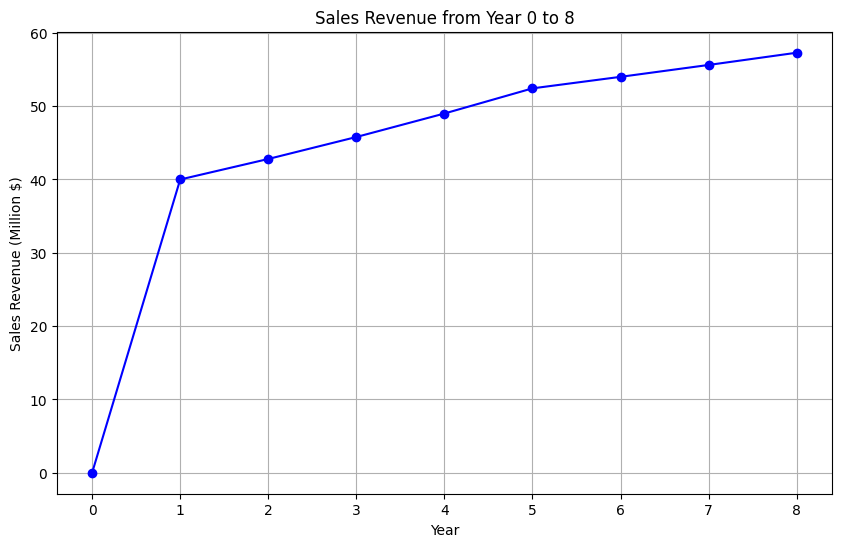

In [ ]:
import matplotlib.pyplot as plt

# Sample data
years = list(range(9))

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(years, salesrevenue, marker='o', linestyle='-', color='b')  # for line graph
#plt.bar(years, salesrevenue, color='skyblue')                       # for bar graph

plt.xlabel('Year')
plt.ylabel('Sales Revenue (Million $)')
plt.title('Sales Revenue from Year 0 to 8')
plt.xticks(years)

plt.grid(True)                                 # for line graph
#plt.grid(axis='y', linestyle='--', alpha=0.7) # for bar graph

plt.show()

